In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations

from sklearn.preprocessing import StandardScaler
import torch

## Load the Data

In [52]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_2/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_2/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Output
0,0.665800,0.123969,0.538996
1,0.877791,0.778628,0.420586
2,0.142699,0.349005,-0.065624
3,0.845275,0.711120,0.293993
4,0.454647,0.290455,0.214965
5,0.577713,0.771973,0.023106
6,0.438166,0.685018,0.244619
7,0.341750,0.028698,0.038749
8,0.338648,0.213867,-0.013858
9,0.702637,0.926564,0.611205


In [53]:
#Adicion de datos conforme el concurso ha avanzado

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Output':-0.044753}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# 5 may
new_data=[0.85,0.95,0.05484160179414254]
df.loc[len(df)] = new_data

new_data=[0.1,0.8,-0.0577564314258061]
df.loc[len(df)] = new_data

# 14 may
new_data=[9.99999e-01,1.00000e-06,0.01944588583589875]
df.loc[len(df)] = new_data

new_data=[0.444445,0.999999,-0.0007443442707457]
df.loc[len(df)] = new_data

new_data=[0.7,0.5,0.55896537142754]
df.loc[len(df)] = new_data

# 17 may
df.loc[len(df)]=[0.919191,0.323233,0.050874157913782]

# 20 may
df.loc[len(df)]=[0.686868,0.313132,0.609158824668268]
df.loc[len(df)]=[0.747474,0.595959,0.360100578670999]

# 2 jun
df.loc[len(df)]=[0.676767,0.444445,0.5220456532152729]

# 13 jun
df.loc[len(df)]=[0.689922,0.930232,0.54252822]
df.loc[len(df)]=[0.620155,0.224807,0.154576701]

# 18 jun
df.loc[len(df)]=[0.728682,0.356589,0.569961728417109]
df.loc[len(df)]=[0.697674,0.333334,0.715111390929695]

# 22 jun
df.loc[len(df)]=[0.759519,0.198397,0.345252976129349]

#Print
df

,Input_1,Input_2,Output
0,0.665800,0.123969,0.538996
1,0.877791,0.778628,0.420586
2,0.142699,0.349005,-0.065624
3,0.845275,0.711120,0.293993
4,0.454647,0.290455,0.214965
5,0.577713,0.771973,0.023106
6,0.438166,0.685018,0.244619
7,0.341750,0.028698,0.038749
8,0.338648,0.213867,-0.013858
9,0.702637,0.926564,0.611205


# Function 2: Optimising Noisy Models
### This corresponds to trying to optimise an unknown machine learning model. However, the initialization of the model is very important, meaning your observations will be very noisy, and the problem might have a lot of local optima! You are trying to make the model’s log-likelihood as large as possible.

## Data exploration

In [54]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2     Output
count  25.000000  25.000000  25.000000
mean    0.604677   0.478421   0.268254
std     0.248864   0.311927   0.259141
min     0.100000   0.000001  -0.065624
25%     0.444445   0.224807   0.023106
50%     0.686868   0.356589   0.244619
75%     0.747474   0.771973   0.538996
max     0.999999   0.999999   0.715111

Missing values in the dataset:
Input_1    0
Input_2    0
Output     0
dtype: int64


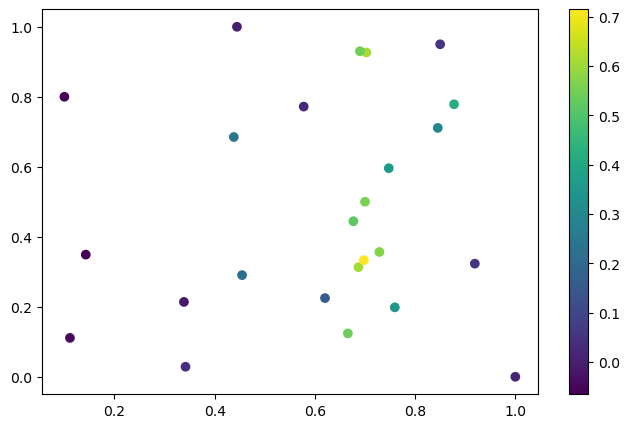

In [55]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(df['Input_1'], df['Input_2'], c = df['Output'])
plt.colorbar();

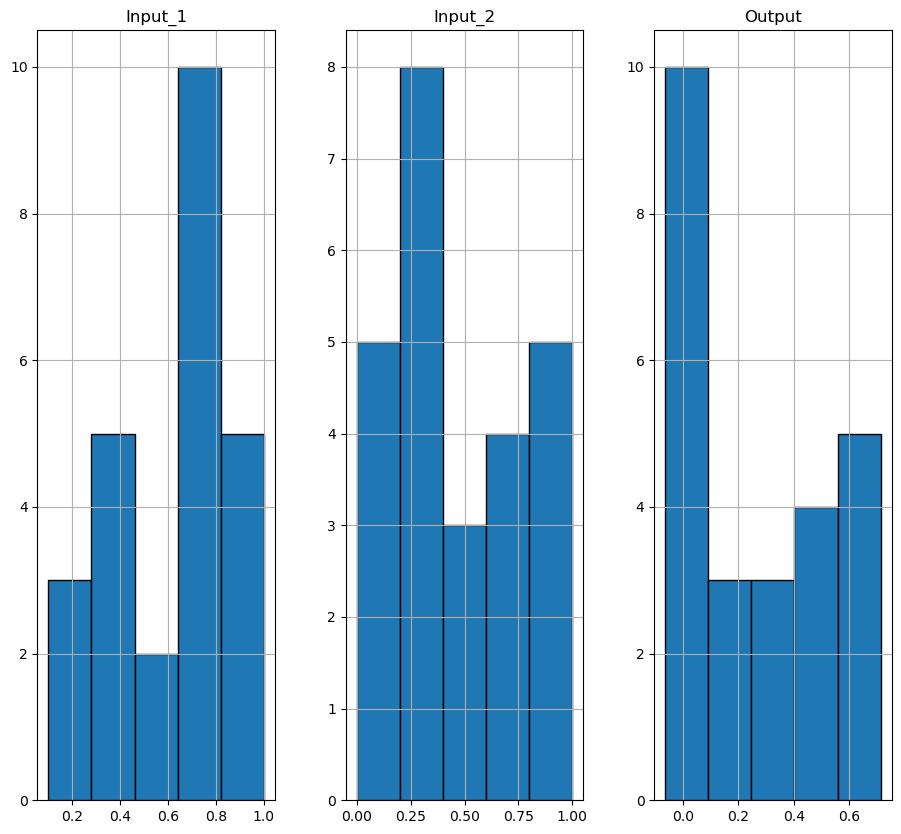

In [56]:
# Plot histograms for each column to understand distributions
df.hist(bins=5, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

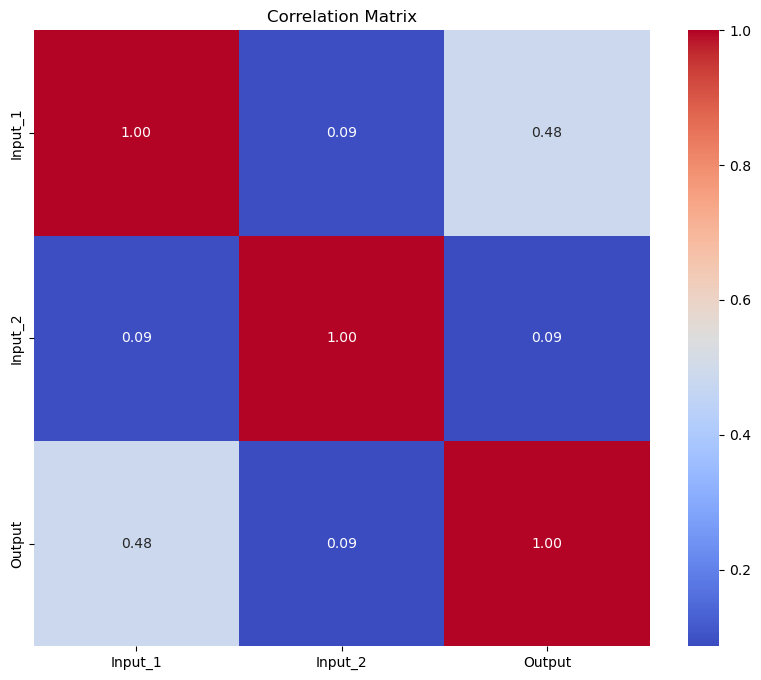

In [57]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

/Users/macponcho/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


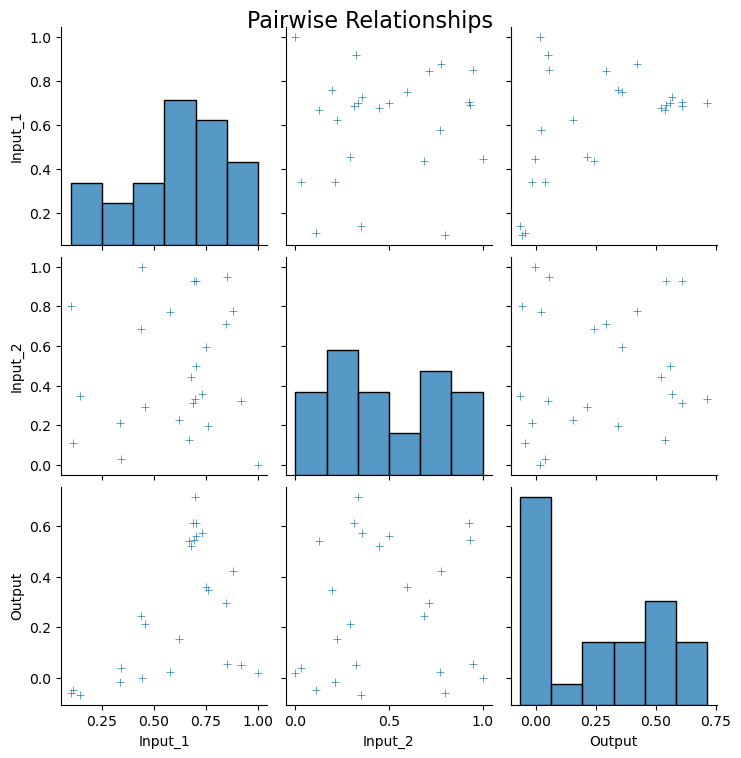

In [58]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

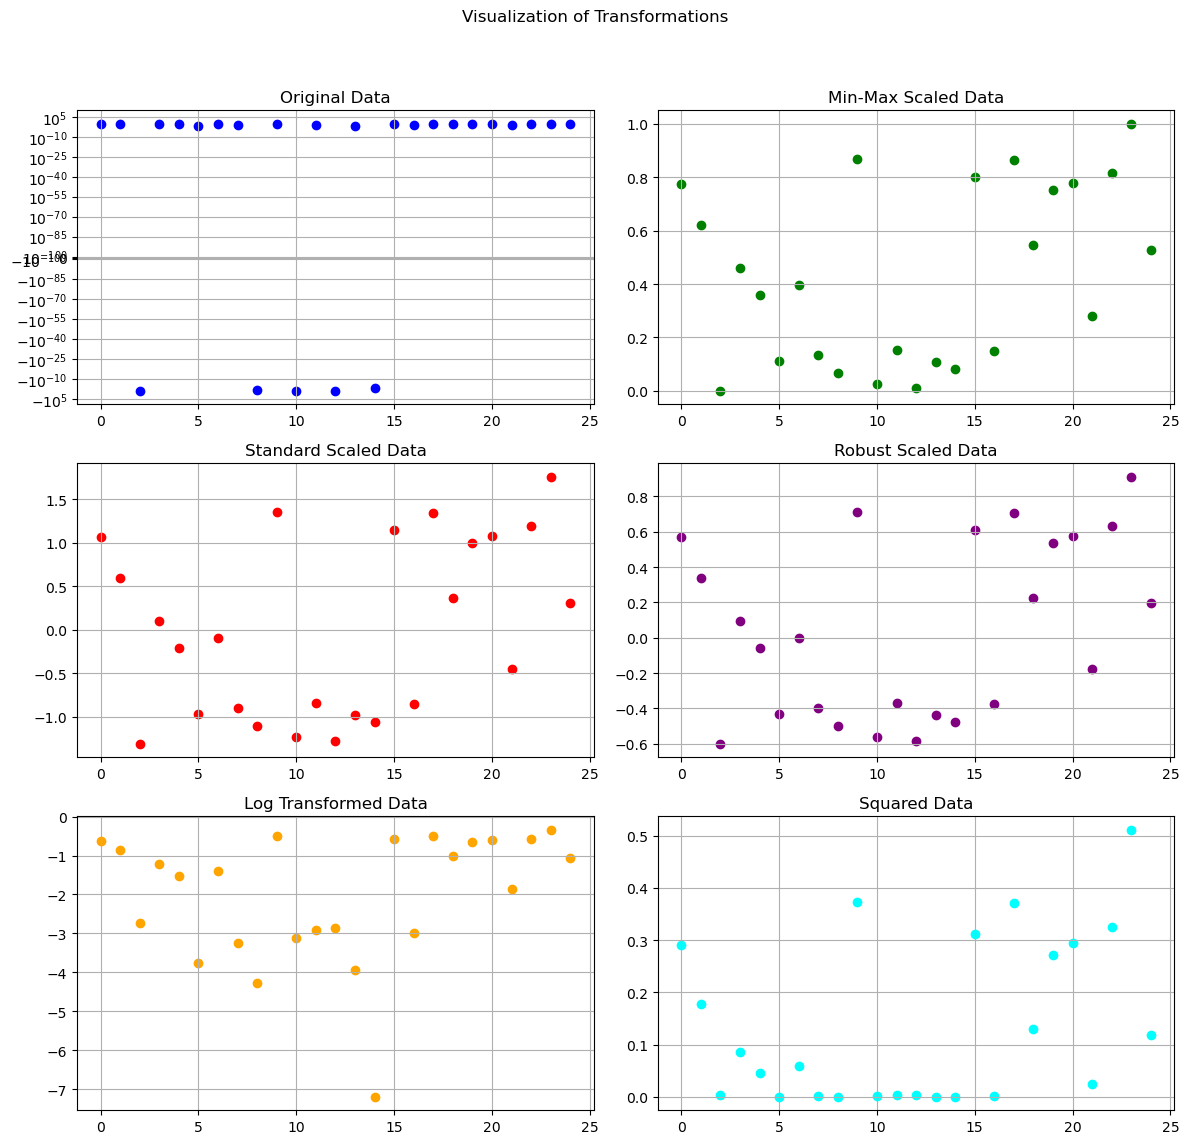

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import norm

new_df=df

# Applying various transformations
scaler_min_max = MinMaxScaler()
new_df['Min_Max_Scaled'] = scaler_min_max.fit_transform(new_df[['Output']])

scaler_standard = StandardScaler()
new_df['Standard_Scaled'] = scaler_standard.fit_transform(new_df[['Output']])

scaler_robust = RobustScaler()
new_df['Robust_Scaled'] = scaler_robust.fit_transform(new_df[['Output']])

# Log transformation with a small shift to handle zero and negative values
epsilon = 1e-100  # Small constant to avoid log(0)
new_df['Log_Transformed'] = np.log(new_df['Output'].abs() + epsilon)

# Square transformation
new_df['Squared'] = np.power(new_df['Output'], 2)

# Plotting the original and transformed data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Visualization of Transformations')

# Original Data
axes[0, 0].scatter(new_df.index, new_df['Output'], color='blue')
axes[0, 0].set_title('Original Data')
axes[0, 0].set_yscale('symlog', linthresh=epsilon)
axes[0, 0].grid(True)

# Min-Max Scaled Data
axes[0, 1].scatter(new_df.index, new_df['Min_Max_Scaled'], color='green')
axes[0, 1].set_title('Min-Max Scaled Data')
axes[0, 1].grid(True)

# Standard Scaled Data
axes[1, 0].scatter(new_df.index, new_df['Standard_Scaled'], color='red')
axes[1, 0].set_title('Standard Scaled Data')
axes[1, 0].grid(True)

# Robust Scaled Data
axes[1, 1].scatter(new_df.index, new_df['Robust_Scaled'], color='purple')
axes[1, 1].set_title('Robust Scaled Data')
axes[1, 1].grid(True)

# Log Transformed Data
axes[2, 0].scatter(new_df.index, new_df['Log_Transformed'], color='orange')
axes[2, 0].set_title('Log Transformed Data')
axes[2, 0].grid(True)

# Squared Data
axes[2, 1].scatter(new_df.index, new_df['Squared'], color='cyan')
axes[2, 1].set_title('Squared Data')
axes[2, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Tasks

- Detect Outliers
- Data normalization if needed
- 

## FOR THIS CASE ONLY


# 28 Apr. Ask 1. [0.100000-0.800000]

- Casi todo me da explorar un query=(0,1) porque es area inexplorada
- Voy a ir por el extremo again para armar los extremos
- tengo otras alternativas mas hacia 0.85,0.98 si uso lenghtscale mas pequeño, pèro empiezo por explorar el espacio

#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.850000-0.950000]
- [0.100000-0.800000]

#### 10 may
Ç(0.444445,0.999999) y (1,0) cubren el 1.96 std y 2.6 std
Falta explorar mas en X2=0.5
- [0.999999-0.000001]
- [0.444445-0.999999]
- Si tuviera que hacer una tercera seria 
- [0.700000-0.500000]

#### 14 may
Encontramos otro CASI maximo en 0,7-0,5. 0.7 en X1 es una zona claramente importante
***
- Beta 1.96 [0.878787-0.313132]
- Beta casi CERO [0.696969-0.363637]
- Beta 2.6 [0.919191-0.323233]
- ONLY std [0.999999-0.353536]
- ******* Exploratiorio -- Vamos por [0.919191-0.323233] --- Muy negativo

#### 17 may
- *** len 0,3 noise 10-4
- Beta 1.96 [0.707070-0.313132], Beta casi CERO [0.696969-0.343435], ONLY std [0.000001-0.999999]
- *** len 0.2 noise 10-4
- Beta 1.96 [0.686868-0.313132], Beta casi CERO [0.646464-0.404041], Beta 2.6 [0.000001-0.999999]
- *** len 0.1
- Beta 2.6 [0.666666-0.323233], ONLY std [0.000001-0.565656], 
- ****** Con optimizador: 
- UCB [0.747474-0.595959], EI: [0.000001-0.767676]
- ******* VAMOS POR
- ******* [0.686868-0.313132], [0.747474-0.595959]

#### 1 jun
Vamos por el log likelihood
[0.676767-0.444445] * not bad pero no el maxio

#### 2 jun
Beta 1.96 [0.620155-0.224807] ++
Beta casi CERO [0.689922-0.930232] +
Beta 2.6 [0.604651-0.224807]
ONLY std [0.000001-0.558139]
Next query point EI: [0.155039-0.310078]
Next query point PI: [0.093024-0.790697]

- * VAMOS POR [0.689922-0.930232] y [0.620155-0.224807]

#### 12 jun
sin log like
Beta 1.96 [0.333334-0.488372]
Beta casi CERO [0.759689-0.248063]
Beta 2.6 [0.317830-0.503876]

con loglike
Beta 0.5 [0.697674-0.333334] ++
Beta 1.00 [0.713178-0.341086]
Beta 1.96 [0.728682-0.356589] +  **new max

con log like y cambiando rangos de length
Beta 0.5 [0.705426-0.333334]
Beta 1.00 [0.720930-0.341086]
Beta 1.96 [0.736434-0.356589]
Beta casi CERO [0.689922-0.325582]
Beta 2.6 [0.751937-0.356589]

** Vamos por
- [0.728682-0.356589] y [0.697674-0.333334]

#### 18 jun

Log like normal
Beta 0.5 [0.736434-0.302326]
Beta 1.00 [0.751937-0.279070]
Beta 1.96 [0.767441-0.201551]
Beta casi CERO [0.728682-0.317830]
Next query point EI: [0.155039-0.325582]
Next query point PI: [0.093024-0.790697]

Next query point UCB with Beta 1.96: [0.759519-0.198397]++
Next query point UCB with Beta 0.01: [0.727455-0.302605]
Next query point UCB with Beta 1: [0.743487-0.244489]
Next query point UCB with Beta 2.6: [0.769539-0.180361]
Next query point EI: [0.148297-0.308617]
Next query point PI: [0.088176-0.793587]


-*** Vamos por [0.759519-0.198397]

# New model

In [60]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df[['Input_1', 'Input_2']].values
y = df[['Output']].values

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1e-0, name='length_scale'),
    Real(1e-12, 1e-2, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

# Define ranges for each input
input_ranges = [(0.0, 1.0), (0.00, 1.0)]  # Example ranges for two inputs

GG = 500  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)
X_grid_scaled = scaler_X.transform(X_grid)  # Scale the grid points

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")


# Test different beta values for UCB and other acquisition functions
for beta in [0.01, 1, 2.6]:
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")

# Use other acquisition functions
acquisition_function_ei = gaussian_ei(X_grid_scaled, model=GPR_model_best, xi=0.01)
idx_max_ei = np.argmax(acquisition_function_ei)
next_query_ei = X_grid[idx_max_ei]
formatted_row_ei = '-'.join(format(x, ".6f") for x in next_query_ei)
print(f"Next query point EI: [{formatted_row_ei}]")

acquisition_function_pi = gaussian_pi(X_grid_scaled, model=GPR_model_best, xi=0.01)
idx_max_pi = np.argmax(acquisition_function_pi)
next_query_pi = X_grid[idx_max_pi]
formatted_row_pi = '-'.join(format(x, ".6f") for x in next_query_pi)
print(f"Next query point PI: [{formatted_row_pi}]")

Best length scale: 0.15881002214207826
Best noise level: 0.007035889106868652
Next query point UCB with Beta 1.96: [0.669339-0.362725]
Next query point UCB with Beta 0.01: [0.693387-0.346693]
Next query point UCB with Beta 1: [0.683367-0.358717]
Next query point UCB with Beta 2.6: [0.729459-0.849699]
Next query point EI: [0.142285-0.348697]
Next query point PI: [0.142285-0.348697]


/Users/macponcho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


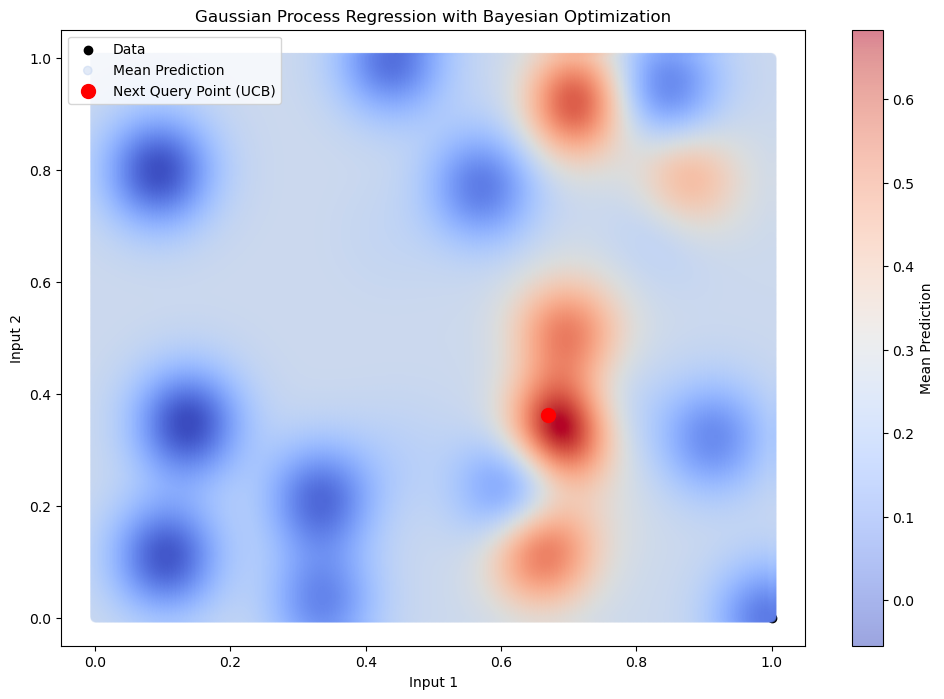

In [61]:
# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c='black', label='Data')
plt.scatter(X_grid[:, 0], X_grid[:, 1], c=mean, cmap='coolwarm', label='Mean Prediction', alpha=0.5)
plt.colorbar(label='Mean Prediction')
plt.scatter(next_query_ucb[0], next_query_ucb[1], color='red', s=100, label='Next Query Point (UCB)')
plt.title('Gaussian Process Regression with Bayesian Optimization')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.show()
